In [39]:
# Importing pandas library for data manipulation
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
# Loading the datasets from local files
customers = pd.read_csv(r"C:\Users\Windows 10\Downloads\Customers.csv")
products = pd.read_csv(r"C:\Users\Windows 10\Downloads\Products.csv")
transactions = pd.read_csv(r"C:\Users\Windows 10\Downloads\Transactions.csv")

In [41]:
# Displaying the first few rows of each dataset to verify the data has loaded correctly
print(customers.head())
print(products.head())
print(transactions.head())

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

In [42]:
# Checking shape of the data
print(f"Customers: {customers.shape}")
print(f"Products: {products.shape}")
print(f"Transactions: {transactions.shape}")

Customers: (200, 4)
Products: (100, 4)
Transactions: (1000, 7)


In [43]:
# Data types and column info
print(customers.info())
print(products.info())
print(transactions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------

In [44]:
# Summary of each dataset
print(customers.describe(include='all'))  # Includes categorical data
print(products.describe(include='all'))
print(transactions.describe(include='all'))


       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3
       ProductID            ProductName Category       Price
count        100                    100      100  100.000000
unique       100                     66        4         NaN
top         P001  ActiveWear Smartwatch    Books         NaN
freq           1                      4       26         NaN
mean         NaN                    NaN      NaN  267.551700
std          NaN                    NaN      NaN  143.219383
min          NaN                    NaN      NaN   16.080000
25%          NaN                    NaN      NaN  147.767500
50%          NaN                    NaN      NaN  292.875000
75%          NaN                    NaN      NaN  397.090000
max          N

In [45]:
# Check for missing values and duplicates
print(customers.isnull().sum())
print(customers.duplicated().sum())

# Convert 'SignupDate' to datetime
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])


CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
0


In [46]:
# Check for missing values and duplicates
print(products.isnull().sum())
print(products.duplicated().sum())

# Ensure 'Price' is numeric
products['Price'] = pd.to_numeric(products['Price'], errors='coerce')


ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
0


In [47]:
# Check for missing values and duplicates
print(transactions.isnull().sum())
print(transactions.duplicated().sum())

# Convert 'TransactionDate' to datetime
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])


TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64
0


In [48]:
# Merge Transactions and Products on 'ProductID'
transactions_products = transactions.merge(products, on='ProductID', how='left')

# Merge the result with Customers on 'CustomerID'
merged_data = transactions_products.merge(customers, on='CustomerID', how='left')

# Display the first few rows to confirm the merge
print(merged_data.head())

  TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0        T00001      C0199      P067 2024-08-25 12:38:23         1   
1        T00112      C0146      P067 2024-05-27 22:23:54         1   
2        T00166      C0127      P067 2024-04-25 07:38:55         1   
3        T00272      C0087      P067 2024-03-26 22:55:37         2   
4        T00363      C0070      P067 2024-03-21 15:10:10         3   

   TotalValue  Price_x                      ProductName     Category  Price_y  \
0      300.68   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68   
1      300.68   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68   
2      300.68   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68   
3      601.36   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68   
4      902.04   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68   

      CustomerName         Region SignupDate  
0   Andrea Jenkins         Europe 2022-12-03 

In [49]:
# Since Price_x and Price_y contain the same values, so I will keep one and delete other
merged_data = merged_data.drop(columns=['Price_y'])

In [50]:
print(merged_data.isnull().sum())

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price_x            0
ProductName        0
Category           0
CustomerName       0
Region             0
SignupDate         0
dtype: int64


In [51]:
# Total Revenue by Region
revenue_by_region = merged_data.groupby('Region')['TotalValue'].sum()
print(revenue_by_region)

Region
Asia             152074.97
Europe           166254.63
North America    152313.40
South America    219352.56
Name: TotalValue, dtype: float64


In [52]:
# Top-Selling Products
top_products = merged_data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)
print(top_products)

ProductName
ActiveWear Smartwatch    100
SoundWave Headphones      97
HomeSense Desk Lamp       81
ActiveWear Rug            79
SoundWave Cookbook        78
ActiveWear Jacket         76
BookWorld Biography       71
TechPro T-Shirt           66
SoundWave Desk Lamp       64
TechPro Textbook          62
Name: Quantity, dtype: int64


In [53]:
# Customer Segmentation by Spending
customer_spending = merged_data.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False)
print(customer_spending.head(10))

CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
C0188     7111.32
C0059     7073.28
C0028     6819.57
C0099     6715.72
C0165     6708.10
Name: TotalValue, dtype: float64


Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64


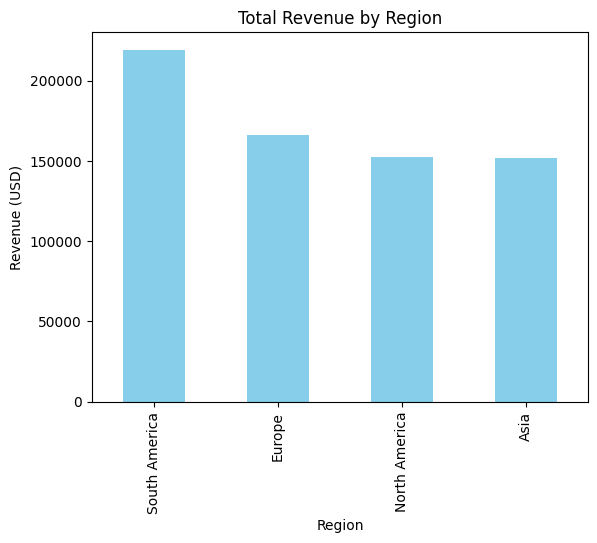

In [54]:
# 1. REVENUE BY REGION
# Calculate revenue by region
revenue_by_region = merged_data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)

# Display the results
print(revenue_by_region)

# Visualize the revenue distribution
revenue_by_region.plot(kind='bar', title='Total Revenue by Region', color='skyblue')
plt.ylabel('Revenue (USD)')
plt.show()


ProductName
ActiveWear Smartwatch    100
SoundWave Headphones      97
HomeSense Desk Lamp       81
ActiveWear Rug            79
SoundWave Cookbook        78
ActiveWear Jacket         76
BookWorld Biography       71
TechPro T-Shirt           66
SoundWave Desk Lamp       64
TechPro Textbook          62
Name: Quantity, dtype: int64


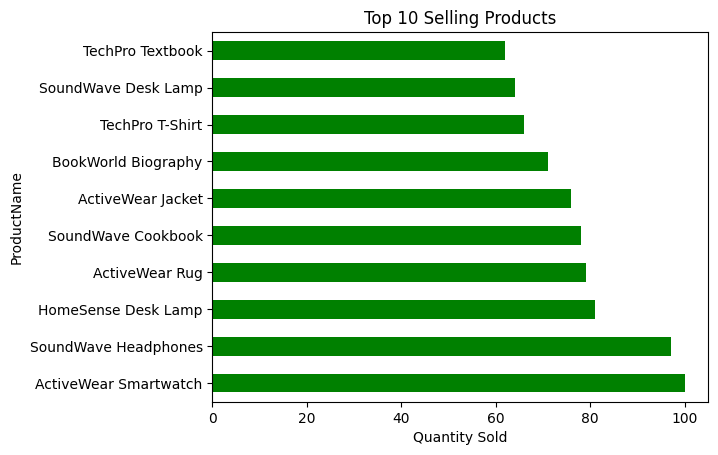

In [55]:
# 2. Top-Selling Products
# Calculate top-selling products
top_products = merged_data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)

# Display the results
print(top_products)

# Visualize the top-selling products
top_products.plot(kind='barh', title='Top 10 Selling Products', color='green')
plt.xlabel('Quantity Sold')
plt.show()


CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
C0188     7111.32
C0059     7073.28
C0028     6819.57
C0099     6715.72
C0165     6708.10
Name: TotalValue, dtype: float64


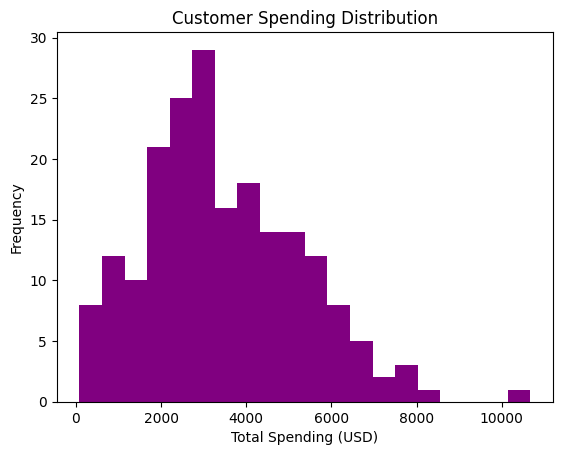

In [56]:
# 3. Customer Spending Distribution
# Calculate total spending by each customer
customer_spending = merged_data.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False)

# Display the top 10 highest spenders
print(customer_spending.head(10))

# Visualize the spending distribution
customer_spending.plot(kind='hist', bins=20, title='Customer Spending Distribution', color='purple')
plt.xlabel('Total Spending (USD)')
plt.show()


TransactionDate
2023-12-30     313.92
2023-12-31    3455.60
2024-01-01    1468.94
2024-01-02    1818.03
2024-01-03    2224.41
               ...   
2024-12-24    2589.58
2024-12-25    1343.90
2024-12-26    5108.25
2024-12-27     752.56
2024-12-28     476.79
Name: TotalValue, Length: 337, dtype: float64


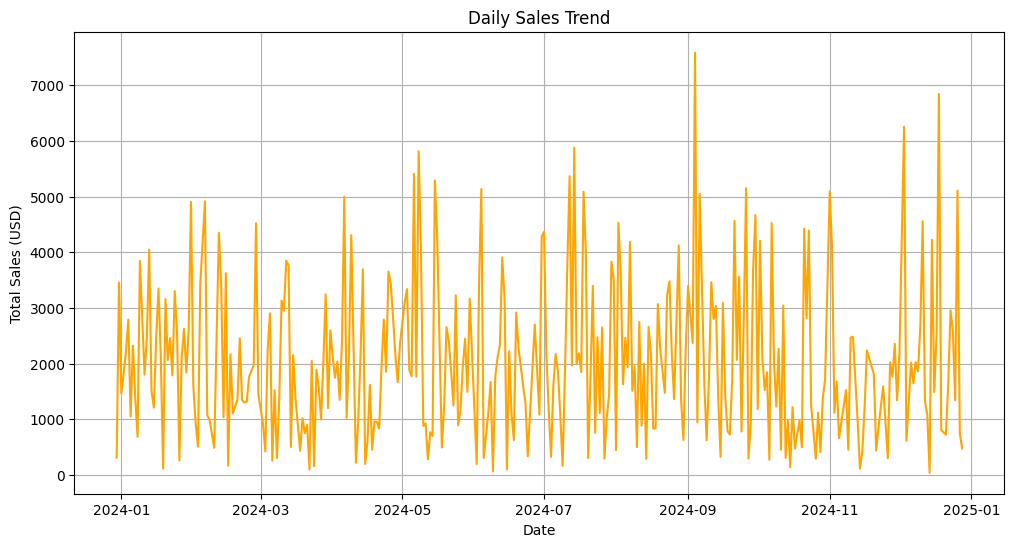

In [57]:
# 4. Sales Trends Over Time
# Group by transaction date and sum total revenue
sales_trend = merged_data.groupby(merged_data['TransactionDate'].dt.date)['TotalValue'].sum()

# Display the sales trend
print(sales_trend)

# Visualize the sales trend
sales_trend.plot(title='Daily Sales Trend', figsize=(12, 6), color='orange')
plt.ylabel('Total Sales (USD)')
plt.xlabel('Date')
plt.grid()
plt.show()


Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64


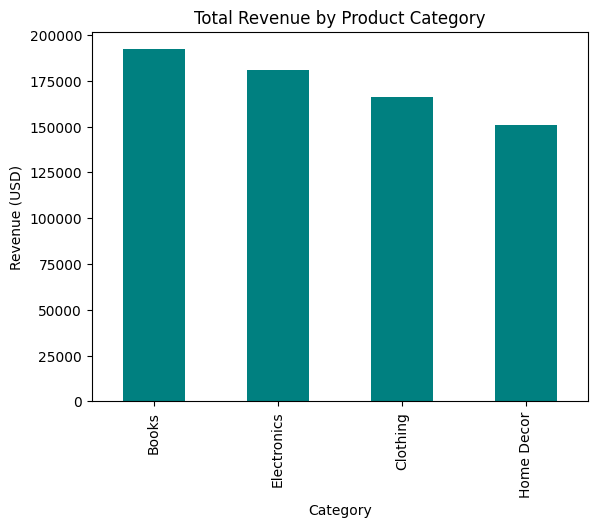

In [58]:
# 5. Revenue by Product Category
# Calculate revenue by category
revenue_by_category = merged_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)

# Display the results
print(revenue_by_category)

# Visualize the revenue by category
revenue_by_category.plot(kind='bar', title='Total Revenue by Product Category', color='teal')
plt.ylabel('Revenue (USD)')
plt.show()


In [59]:
# 6. Average Order Value (AOV)
# Calculate average order value
average_order_value = merged_data['TotalValue'].mean()
print(f"The Average Order Value (AOV) is ${average_order_value:.2f}")


The Average Order Value (AOV) is $690.00


In [60]:
# 7. Repeat Customers vs. One-Time Buyers
# Count transactions per customer
customer_transaction_counts = merged_data['CustomerID'].value_counts()

# Calculate repeat and one-time buyers
repeat_customers = customer_transaction_counts[customer_transaction_counts > 1].count()
one_time_buyers = customer_transaction_counts[customer_transaction_counts == 1].count()

print(f"Repeat Customers: {repeat_customers}")
print(f"One-Time Buyers: {one_time_buyers}")

Repeat Customers: 187
One-Time Buyers: 12


DayOfWeek
Wednesday    119203.15
Tuesday      108567.61
Monday       101984.33
Thursday      99202.71
Sunday        92605.93
Friday        87032.09
Saturday      81399.74
Name: TotalValue, dtype: float64


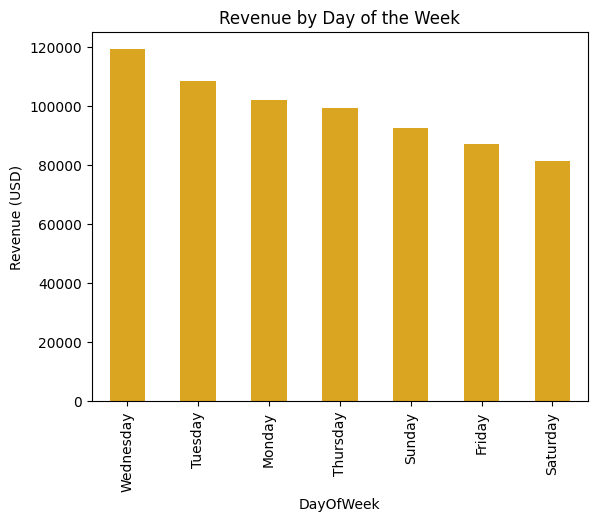

In [61]:
# 8. Popular Days for Transactions
# Extract day of the week
merged_data['DayOfWeek'] = merged_data['TransactionDate'].dt.day_name()

# Calculate revenue by day of the week
revenue_by_day = merged_data.groupby('DayOfWeek')['TotalValue'].sum().sort_values(ascending=False)

print(revenue_by_day)

# Visualize the revenue by day
revenue_by_day.plot(kind='bar', title='Revenue by Day of the Week', color='goldenrod')
plt.ylabel('Revenue (USD)')
plt.show()


Category          Books  Clothing  Electronics  Home Decor
Region                                                    
Asia           33119.03  49353.09     35658.15    33944.70
Europe         47464.42  36335.59     41562.60    40892.02
North America  41811.99  38038.49     44716.43    27746.49
South America  69752.03  42443.49     58846.32    48310.72


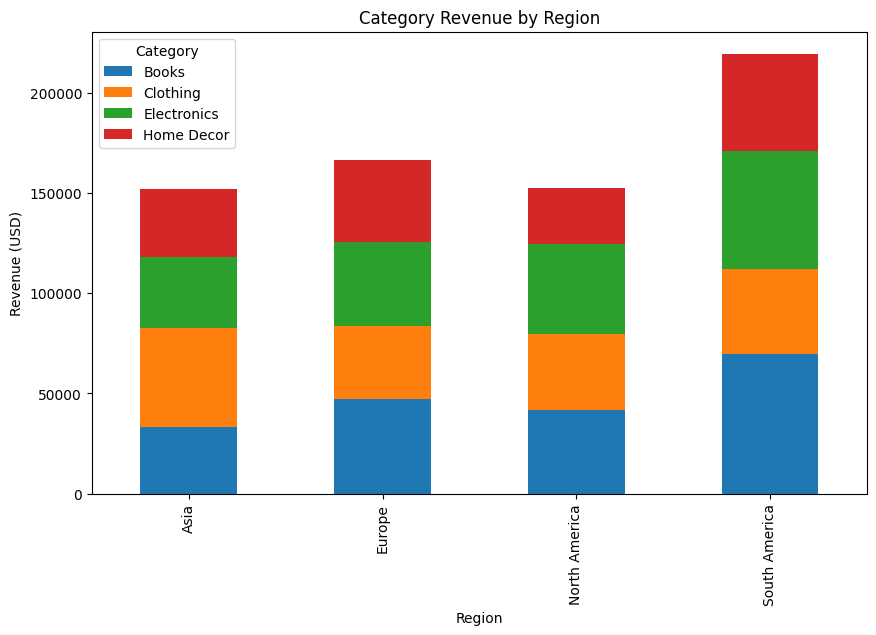

In [62]:
# 9. Category Performance by Region
# Revenue by category and region
category_region_performance = merged_data.groupby(['Region', 'Category'])['TotalValue'].sum().unstack()

print(category_region_performance)

# Visualize category performance per region
category_region_performance.plot(kind='bar', stacked=True, figsize=(10, 6), title='Category Revenue by Region')
plt.ylabel('Revenue (USD)')
plt.show()


Region
Asia             697.591606
Europe           710.489872
North America    624.235246
South America    721.554474
dtype: float64


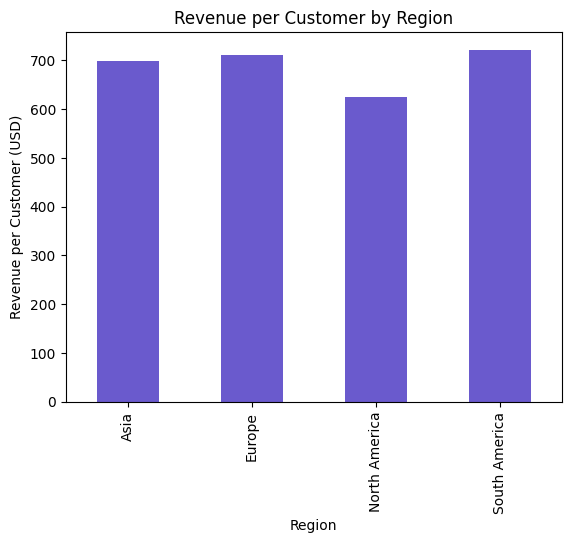

In [63]:
# 10. High-Spending Regions
# Revenue per customer by region
revenue_per_customer = merged_data.groupby('Region')['TotalValue'].sum() / merged_data['Region'].value_counts()

print(revenue_per_customer)

# Visualize revenue per customer by region
revenue_per_customer.plot(kind='bar', title='Revenue per Customer by Region', color='slateblue')
plt.ylabel('Revenue per Customer (USD)')
plt.show()


Category
Books          57644.241
Clothing       49851.198
Electronics    54235.050
Home Decor     45268.179
Name: Profit, dtype: float64


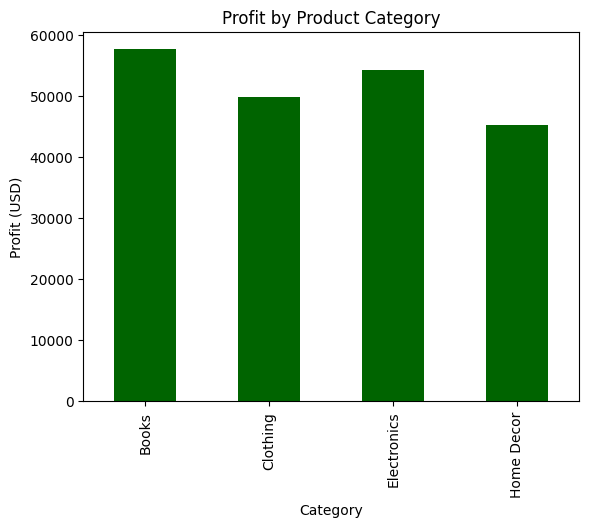

In [64]:
# 11. Profitability Analysis
# Assuming a 30% profit margin for all products
merged_data['Profit'] = merged_data['TotalValue'] * 0.30

# Total profit by category
profit_by_category = merged_data.groupby('Category')['Profit'].sum()
print(profit_by_category)

# Visualize profits by category
profit_by_category.plot(kind='bar', title='Profit by Product Category', color='darkgreen')
plt.ylabel('Profit (USD)')
plt.show()
